# Lorenz System Lyapunov Exponents as $\rho$ changes (paper version)

$$
\begin{split}
\dot{x} &= \sigma(y-x)\\
\dot{y} &= x(\rho-z)-y\\
\dot{z} &= xy - \beta z
\end{split}
$$

## $\sigma = 10, \beta = \frac{8}{3}$

## (true system)

In [1]:
#https://github.com/PerezHz/TaylorIntegration.jl/blob/main/examples/Lorenz-Lyapunov-spectrum.ipynb
#https://scicomp.stackexchange.com/questions/36013/numerical-computation-of-lyapunov-exponent
#https://stackoverflow.com/questions/60338471/lyapunov-spectrum-for-known-odes-python-3

# Import libraries
import math     as math
import numpy    as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 
import time     as time

#######################################################################
# E N V I R O N M E N T   S E T   U P
#######################################################################
#---------------------------------------------------------------------#
# To compute elapsed time
#---------------------------------------------------------------------#
start_time = time.time()

In [2]:
#######################################################################
# L I S T   O F   R H O   V A L U E S
#######################################################################
rho_list  = np.arange(0, 331, 1)

rho_list  = np.append(rho_list, np.array([13.926667, 23.9, 24.058, 470./19., 30.485]))
rho_list  = np.append(rho_list, np.array([99.524, 100.795]))
rho_list  = np.append(rho_list, np.array([148.4, 166.07, 214.364, 233.5]))

rho_list  = np.sort(rho_list)

len_rho_list = len(rho_list)

print(len_rho_list)

342


In [3]:
# to compute elapsed time
start_time = time.time()

#ODE system
def func(t, v, sigma, r, b):
    x, y, z = v #unpack the variables
    return [ sigma * (y - x), r * x - y - x * z, x * y - b * z ]

#Jacobian matrix
def JM(v, sigma, r, b):
    x, y, z = [k for k in v]
    return np.array([[-sigma, sigma, 0], [r - z, -1, -x], [y, x, -b]])

D = 3
True_LE   = np.zeros((len_rho_list, D))

for s in range(len_rho_list):
    #initial parameters
    sigma = 10
    r = rho_list[s]
    b = 8/3

    U = np.eye(3) #unit blob
    v0 = np.array([0., 1.,0.]) #np.ones(3) #initial condition
    lyap = [] #empty list to store the lengths of the orthogonal axes

    iters=10**5
    dt=0.001
    tf=iters * dt

    #integrate the ODE system -- hopefully falls into an attractor
    sol = solve_ivp(func, [0, tf], v0, t_eval=np.linspace(0, tf, iters), args=(sigma, r, b))
    v_n = sol.y.T #transpose the solution

    #do this for each iteration
    for k in range(0, iters):
        v0 = v_n[k] #new v0 after iteration
        U_n = np.matmul(np.eye(3) + JM(v0, sigma, r, b) * dt, U)

        #do a Gram-Schmidt Orthogonalisation (GSO)
        Q, R = np.linalg.qr(U_n)
        lyap.append(np.log(abs(R.diagonal())))

        U = Q #new axes after iteration

    True_LE[s] = [sum([lyap[k][j] for k in range(iters)]) / (dt * iters) for j in range(3)]
    print(f'{s:>4d}) Lorenz rho = {r:>7.3f} , LE {True_LE[s]}')
    
# compute elapsed time
print(f'\nElapsed time {time.time() - start_time:6.2e} s')

   0) Lorenz rho =   0.000 , LE [ -1.03269675  -2.65640535 -10.03194272]
   1) Lorenz rho =   1.000 , LE [ -0.09000821  -2.61433704 -11.02654688]
   2) Lorenz rho =   2.000 , LE [ -1.21175965  -1.22710016 -11.28975503]
   3) Lorenz rho =   3.000 , LE [ -1.09890777  -1.12212758 -11.50499277]
   4) Lorenz rho =   4.000 , LE [ -0.9993045   -1.02850326 -11.69561786]
   5) Lorenz rho =   5.000 , LE [ -0.9110445   -0.94230823 -11.8674666 ]
   6) Lorenz rho =   6.000 , LE [ -0.82707622  -0.86680019 -12.02433747]
   7) Lorenz rho =   7.000 , LE [ -0.75170962  -0.79496989 -12.16893252]
   8) Lorenz rho =   8.000 , LE [ -0.68468332  -0.72504613 -12.30328734]
   9) Lorenz rho =   9.000 , LE [ -0.61650771  -0.6648621  -12.42906522]
  10) Lorenz rho =  10.000 , LE [ -0.55706125  -0.60323271 -12.54757529]
  11) Lorenz rho =  11.000 , LE [ -0.49691184  -0.5485958  -12.65984183]
  12) Lorenz rho =  12.000 , LE [ -0.44151464  -0.49356128 -12.76779431]
  13) Lorenz rho =  13.000 , LE [ -0.38551406  -0.4

 109) Lorenz rho = 102.000 , LE [  1.71868452   0.03097311 -15.28450614]
 110) Lorenz rho = 103.000 , LE [  1.8232908    0.02939141 -15.38623856]
 111) Lorenz rho = 104.000 , LE [  1.88498193   0.02500861 -15.44530361]
 112) Lorenz rho = 105.000 , LE [  1.65154073   0.02304424 -15.20302236]
 113) Lorenz rho = 106.000 , LE [ 1.98221121e+00  9.38865851e-03 -1.55252777e+01]
 114) Lorenz rho = 107.000 , LE [  1.74051792   0.02509826 -15.29301893]
 115) Lorenz rho = 108.000 , LE [  1.70557686   0.0341478  -15.26306615]
 116) Lorenz rho = 109.000 , LE [  1.73198371   0.03126201 -15.28702876]
 117) Lorenz rho = 110.000 , LE [  1.60252154   0.03044574 -15.15310508]
 118) Lorenz rho = 111.000 , LE [  1.7814227    0.02228404 -15.32790479]
 119) Lorenz rho = 112.000 , LE [  1.93847202   0.02280221 -15.48781204]
 120) Lorenz rho = 113.000 , LE [  1.78895813   0.03921107 -15.34206679]
 121) Lorenz rho = 114.000 , LE [  1.78255226   0.04793092 -15.3389661 ]
 122) Lorenz rho = 115.000 , LE [  1.77742

 222) Lorenz rho = 213.000 , LE [  1.1536763    0.16162297 -14.62502358]
 223) Lorenz rho = 214.000 , LE [  1.02409636   0.17185806 -14.50144248]
 224) Lorenz rho = 214.364 , LE [  0.8390232    0.11987861 -14.26369463]
 225) Lorenz rho = 215.000 , LE [  1.20715567   0.15977697 -14.67077855]
 226) Lorenz rho = 216.000 , LE [  0.77960311   0.17589517 -14.25574738]
 227) Lorenz rho = 217.000 , LE [  0.74069742   0.18112035 -14.22127493]
 228) Lorenz rho = 218.000 , LE [  0.84136298   0.18385887 -14.31980117]
 229) Lorenz rho = 219.000 , LE [  0.76176768   0.17033589 -14.22547637]
 230) Lorenz rho = 220.000 , LE [  0.39252551   0.16189781 -13.84365706]
 231) Lorenz rho = 221.000 , LE [  0.32747165  -0.03876285 -13.57603328]
 232) Lorenz rho = 222.000 , LE [  0.31304754   0.20548932 -13.80469406]
 233) Lorenz rho = 223.000 , LE [  0.4198682    0.21487124 -13.91749355]
 234) Lorenz rho = 224.000 , LE [  0.28894398  -0.14156891 -13.42650154]
 235) Lorenz rho = 225.000 , LE [  0.28771542  -0.4

 336) Lorenz rho = 325.000 , LE [  0.51990192   0.28154869 -13.80317498]
 337) Lorenz rho = 326.000 , LE [  0.5129812    0.25958251 -13.77172215]
 338) Lorenz rho = 327.000 , LE [  0.52533418   0.23728737 -13.75898441]
 339) Lorenz rho = 328.000 , LE [  0.50987545   0.30796105 -13.8109861 ]
 340) Lorenz rho = 329.000 , LE [  0.51801791   0.25478634 -13.76444564]
 341) Lorenz rho = 330.000 , LE [  0.50759662   0.23743295 -13.73433231]

Elapsed time 3.29e+03 s


In [4]:
import pandas as pd
# Convert numpy array to pandas DataFrame
df_True_LE = pd.DataFrame(True_LE)

# Name columns
df_True_LE.columns =['lambda_1', 'lambda_2', 'lambda_3']

# Using DataFrame.insert() to add a column
df_True_LE.insert(0, "rho_Lorenz",rho_list, True)

# Save DataFrame to .csv
df_True_LE.to_csv('climate/df_True_LE_x_PAPER.csv', index=False, header=True, decimal='.', sep=';')
#

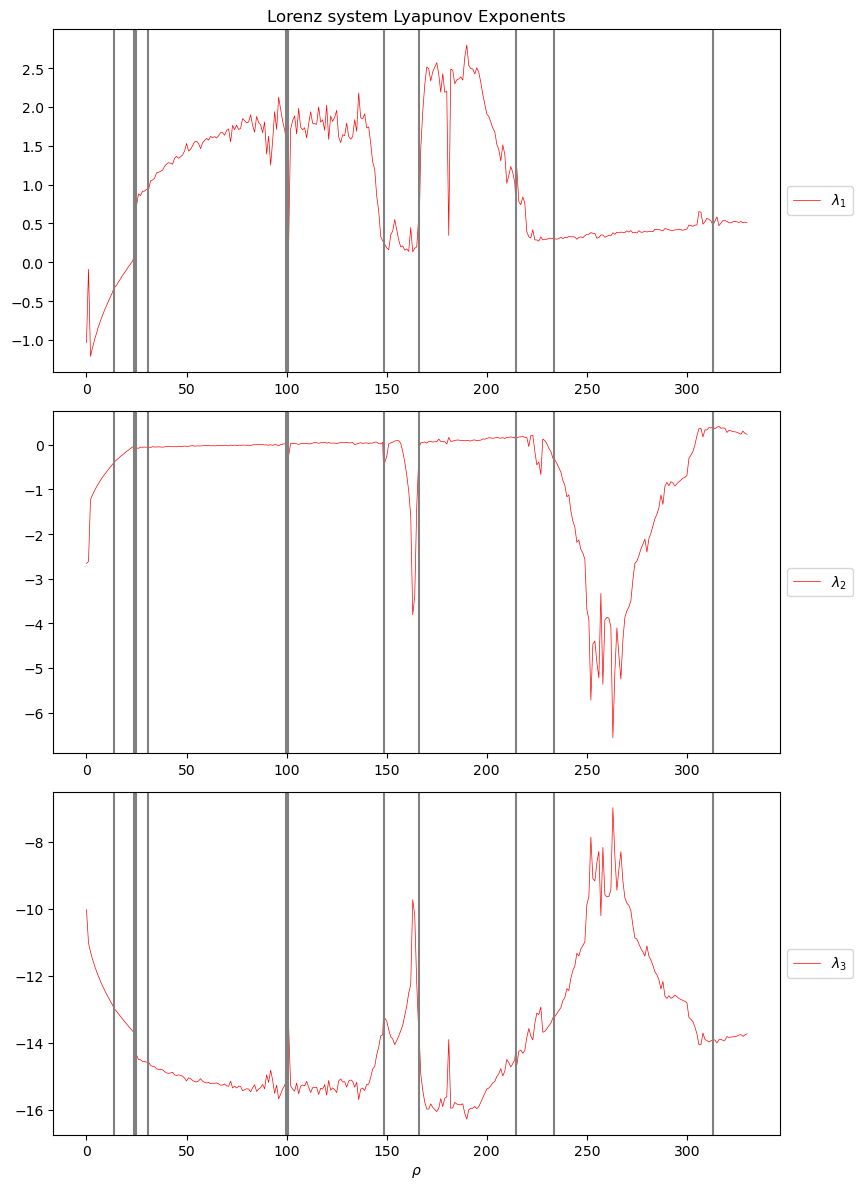

In [5]:
# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
axs[0].set_title("Lorenz system Lyapunov Exponents")

for i in range(D):
    axs[i].plot(rho_list, True_LE[:,i] , label= axis_test_label[i], color='red' , lw = 0.5)
    #
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    axs[i].axvline(x = 13.926667, color = 'grey')
    axs[i].axvline(x = 23.926667, color = 'grey')
    axs[i].axvline(x = 24.058   , color = 'grey')
    axs[i].axvline(x = 470./19. , color = 'grey')
    axs[i].axvline(x = 30.485   , color = 'grey')

    axs[i].axvline(x = 99.524   , color = 'grey')
    axs[i].axvline(x = 100.795  , color = 'grey')
    axs[i].axvline(x = 148.4    , color = 'grey')
    axs[i].axvline(x = 166.07   , color = 'grey')
    axs[i].axvline(x = 214.364  , color = 'grey')
    axs[i].axvline(x = 233.5    , color = 'grey')
    axs[i].axvline(x = 313      , color = 'grey')
    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.show()

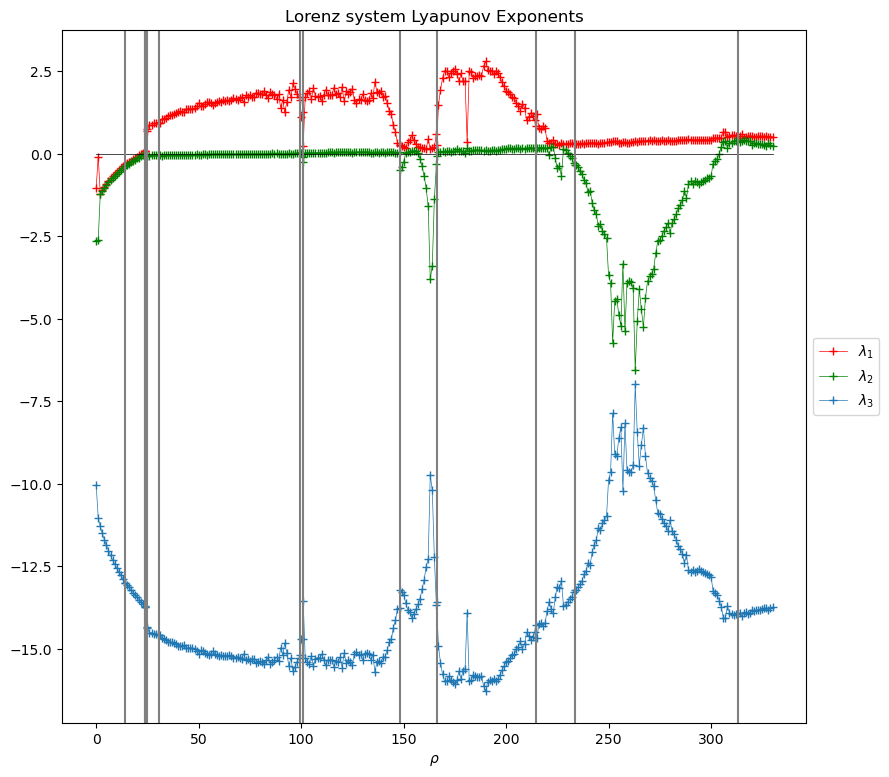

In [6]:
# Plot Lorenz system Lyapunov Exponents
fig = plt.figure(figsize = (12, 9)) 
ax  = fig.add_subplot(1, 1, 1)

axis_test_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
ax.set_title("Lorenz system Lyapunov Exponents")

ax.plot(rho_list, True_LE[:,0] , label= axis_test_label[0], color='red'  , marker='+',lw = 0.5)
ax.plot(rho_list, True_LE[:,1] , label= axis_test_label[1], color='green', marker='+',lw = 0.5)
ax.plot(rho_list, True_LE[:,2] , label= axis_test_label[2], color='C0'   , marker='+',lw = 0.5)
ax.plot(rho_list, 0*True_LE[:,0], color='black', lw = 0.5)
#
ax.axvline(x = 13.926667, color = 'grey')
ax.axvline(x = 23.926667, color = 'grey')
ax.axvline(x = 24.058   , color = 'grey')
ax.axvline(x = 470./19. , color = 'grey')
ax.axvline(x = 30.485   , color = 'grey')
#
ax.axvline(x = 99.524   , color = 'grey')
ax.axvline(x = 100.795  , color = 'grey')
ax.axvline(x = 148.4    , color = 'grey')
ax.axvline(x = 166.07   , color = 'grey')
ax.axvline(x = 214.364  , color = 'grey')
ax.axvline(x = 233.5    , color = 'grey')
ax.axvline(x = 313      , color = 'grey')
#
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!

plt.show()

In [7]:
#---------------------------------------------------------------------#---------------------------------------------------------------------#
# Elapsed time
#---------------------------------------------------------------------#
print(f'\nElapsed time {time.time() - start_time:6.2e} s')


Elapsed time 3.30e+03 s
